This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

* Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
* Age: Positive Integer variable of the reviewers age.
* Title: String variable for the title of the review.
* Review Text: String variable for the review body.
* Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
* Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
* Division Name: Categorical name of the product high level division.
* Department Name: Categorical name of the product department name.
* Class Name: Categorical name of the product class name.

In [ ]:
#importing libraries for textual analysis and calculations
import numpy as np
import pandas as pd

#importing libraries for visualization
from matplotlib import pyplot as plt
import seaborn as sns

# importing libraries for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#importing the dataset
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews (1).csv')

In [ ]:
#displaying top 5 tuples
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Q1:Preprocessing:


## 1.1Find any null values are present or not, If present remove those data.

In [ ]:
#checking for null values
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3351
Review Text                 752
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
#dropping the null values
df = df.dropna()

In [ ]:
#again checking for null values
df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

Inference: No null values left

## 1.2 Remove the data that have less than 5 reviews.

In [ ]:
#creating a separate attribute to keep atrack of total number of reviews
df['Total_count'] = 0

for x in df['Clothing ID'].unique():
    df.loc[df['Clothing ID']==x, 'Total_count'] = df['Clothing ID'].value_counts()[x]
    
df = df[df.Total_count>=5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Total_count
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,221
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,25
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,222
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,18
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,18


# 1.3 Clean the data and remove the special characters and replace the 
# contractions with its expansion. Convert the uppercase character to lower 
## case. Also, remove the punctuations.


In [ ]:
# creating a dictionary with contractions and their expansions
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [ ]:
#defining a function to convert contractions to expansions
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
# using the above function to convert contraction to expansion in every tuple of the 'Review Text' column
df['Review Text'] = df['Review Text'].apply(lambda x:cont_to_exp(x))

In [ ]:
#defining a function to remove special charachters
def Elimination_of_Special_chars(text):
    special_chars = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    if type(text) is str:
        for p in special_chars:
            text = text.replace(p, '')
        return text
    else:
        return text

In [ ]:
# using the above function to remove special charachters in every tuple of the 'Review Text' column
df['Review Text'] = df['Review Text'].apply(lambda x:Elimination_of_Special_chars(x))

In [ ]:
#defining a function to convert uppercase to lowercase
def Convert_to_lower(x):
    if type(x) is str:
        return x.lower()
    else:
        return x

In [ ]:
# using the above function to convert uppercase to lowercase in every tuple of the 'Review Text' column
df['Review Text'] = df['Review Text'].apply(lambda x:Convert_to_lower(x))

In [ ]:
#defining a function to remove punctuations
import string
def Punctuations_Removal(text):
    if type(text) is str:
        for p in string.punctuation:
            text = text.replace(p, '')
        return text
    else:
        return text 

In [ ]:
# using the above function to remove punctuations in every tuple of the 'Review Text' column
df['Review Text'] = df['Review Text'].apply(lambda x:Punctuations_Removal(x))

In [ ]:
#from textblob importing TextBlob for sentimental analysis of the data
from textblob import TextBlob

In [ ]:
#creating separate columns for polarity,review length and word count 
df['polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['review_len'] = df['Review Text'].apply(lambda x:len(x))
df['word_count'] = df['Review Text'].apply(lambda x: len(x.split()))

In [ ]:
#defining function to calculate average word length
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words)    

In [ ]:
# using the above function to calculate average word length in every tuple of the 'Review Text' column
df["avg_word_len"] = df['Review Text'].apply(lambda x: get_avg_word_len(x))

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Total_count,polarity,review_len,word_count,avg_word_len
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,221,0.076392,486,97,4.010309
3,3,1049,50,My favorite buy!,i love love love this jumpsuit it is fun flirt...,5,1,0,General Petite,Bottoms,Pants,25,0.500000,117,23,4.130435
5,5,1080,49,Not for the very petite,i love tracy reese dresses but this one is not...,2,0,4,General,Dresses,Dresses,222,0.178750,479,98,3.897959
6,6,858,39,Cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,18,0.060500,474,99,3.777778
7,7,858,39,"Shimmer, surprisingly goes with lots",i ordered this in carbon for store pick up and...,4,1,4,General Petite,Tops,Knits,18,0.171635,463,98,3.734694


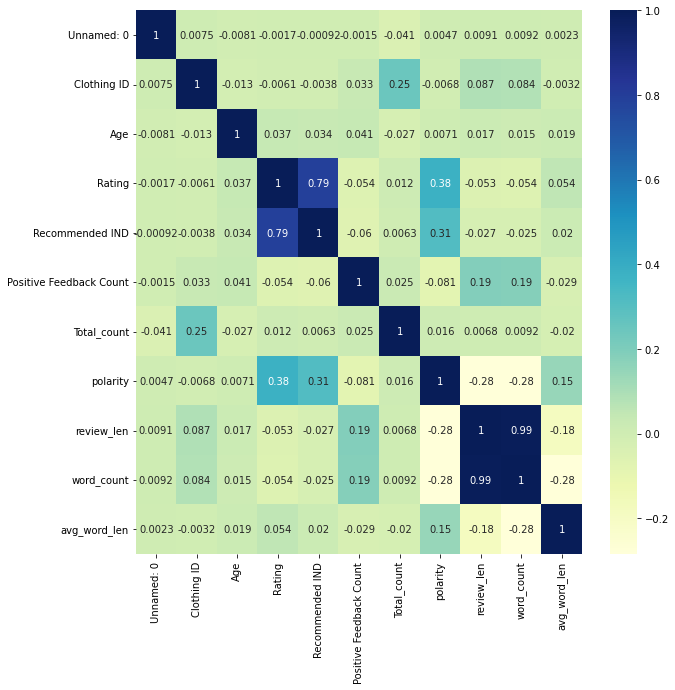

In [ ]:
#plotting heatmap using seaborn
plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
#dropping irrelevant attributes
df = df.drop(columns=['Unnamed: 0', 'Clothing ID', 'Total_count', 'Review Text', 'Title', 'Department Name', 'Division Name', 'Class Name'])

In [ ]:
#displaying final dataset after preprocessing
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,polarity,review_len,word_count,avg_word_len
2,60,3,0,0,0.076392,486,97,4.010309
3,50,5,1,0,0.500000,117,23,4.130435
5,49,2,0,4,0.178750,479,98,3.897959
6,39,5,1,1,0.060500,474,99,3.777778
7,39,4,1,4,0.171635,463,98,3.734694


## Q2: Separate the columns into dependent and independent variables (or features and labels). Then you split those variables into train and test sets (80:20).

In [ ]:
#separating the dependent and independent attributes
x = df.drop(columns=['Recommended IND'])
y = df['Recommended IND']

In [ ]:
#importing train_test_split for splitting of the dataset into traing and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=50)

## Q3:Apply the Naïve Bayes Classification Algorithm on Sentiment category to 
## predict if item is recommended

In [ ]:
# selecting the numerical columns
numerical_cols = [cname for cname in x.columns if x[cname].dtype in ['int64', 'float64']]
# selecting the categorical columns
categorical_cols = [cname for cname in x.columns if x[cname].dtype == 'object']

In [ ]:
#Creating numerical_transformer to scale the continuous numerical data with RobustScaler()
numerical_transformer = Pipeline(steps = [
    ('scaler', RobustScaler())
])

#Creating categorical_transformer to encode the categorical data with OneHotEncoder()
categorical_transformer = Pipeline(steps=[
    ('vectorizer', CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=10)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#Creating preprocessor column transformer to combine the numerical_transformer and one-hot encoding pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
      ])

In [ ]:
#Building prediction model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

In [ ]:
#fiiting the data in the model
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Rating',
                                                   'Positive Feedback Count',
                                                   'polarity', 'review_len',
                                                   'word_count',
                                                   'avg_word_len']),
                                                 ('cat',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer(max_features=10,
                                                                                   ngram_range=(1,
                                                     

In [ ]:
#score of the model
pipe.score(x_test, y_test)

0.9256609642301711

## Q4:Tabulate accuracy in terms of precision, recall and F1 score.

In [ ]:
#from scikit learn importing KFold for model validation
from sklearn.model_selection import KFold
#from scikit learn importing cross_val_score for estimating the skill of the model on new data
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=105, shuffle=True)


In [ ]:
#Precision of the model
precision = cross_val_score(pipe, x, y, cv=cv, scoring='precision')
np.mean(precision)

0.9801417330407233

Infernce: Correct positive predictions relative to total positive predictions are 98% which is extremely good

In [ ]:
#Sensitivity (or recall) of the model
recall = cross_val_score(pipe, x, y, cv=cv, scoring='recall')
np.mean(recall)

0.9318485099592934

Infernce: Correct positive predictions relative to total actual positives are 93% , which is again a very good score

In [ ]:
#F1_score of the model
F1_Score = 2 * (precision * recall) / (precision + recall)
np.mean(F1_Score)

0.9553753101767523

Infernce: The F1_Score of the model is 0.955 which is quite high, hence the model is nearly perfect